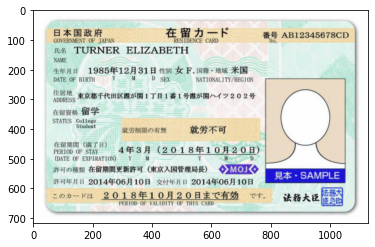

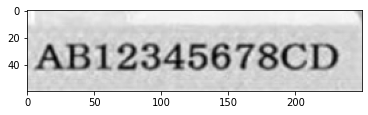

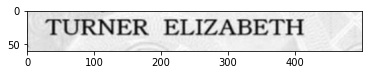

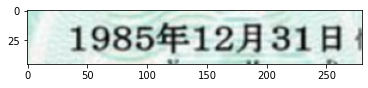

1. Zairyu Card Number : AB12345678CD

2. Name : TURNER ELIZABETH

2. Birthdate : 1985年12月31日



In [6]:
from PIL import Image
import sys
# !apt install tesseract-ocr-jpn
# !pip install pyocr
import pyocr
import pyocr.builders
import cv2
import matplotlib.pyplot as plt
# !pip install pytesseract
import pytesseract

def showimg(img, title=''):
    plt.imshow(img, cmap='gray')
    plt.title(f"{title}", fontproperties='')
    plt.show()

def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
  return cv2.medianBlur(image,5)

def thresholding(image):
  return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  

# 原稿画像の読み込み
src = cv2.imread('sample_data/test1.jpeg', cv2.IMREAD_UNCHANGED)

# set a new width in pixels
new_width = 1127
height = 716
# dsize
dsize = (new_width, height)

# resize image
output = cv2.resize(src, dsize)
showimg(output)
cv2.imwrite('sample_data/test.jpeg',output) 

img_org = cv2.imread("sample_data/test.jpeg")
x=830
y=50
h=60
w=250
img_box = img_org[y:y+h, x:x+w]
#img_box = img_org.crop((770, 40, 1100, 95))

img_box = get_grayscale(img_box)
showimg(img_box)
# img_box = thresholding(img_box)
# showimg(img_box)
# img_box = remove_noise(img_box)
# showimg(img_box)

result = pytesseract.image_to_string(img_box)

#name
x=110
y=110
h=60
w=500
name = img_org[y:y+h, x:x+w]
name = get_grayscale(name)
showimg(name)
full_name = pytesseract.image_to_string(name, lang='eng')

#Birthdate
x=150
y=180
h=45
w=280
birth = img_org[y:y+h, x:x+w]
birthdate = get_grayscale(birth)
showimg(birth)
birthdate = pytesseract.image_to_string(birthdate, lang="jpn")

print("====================================================")
print("1. Zairyu Card Number : " + result)
print("2. Name : " + full_name)
print("2. Birthdate : " + birthdate)

#img_org = Image.open("sample_data/zairyuu3.jpg")
#result = pytesseract.image_to_string(img_box, lang="jpn")

